In [583]:
#import libraries
import os
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils import shuffle
%matplotlib inline

import pandas_profiling


from scipy.stats import skew, norm
from scipy import stats
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, RobustScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNetCV, ElasticNet, LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, classification_report, accuracy_score
from math import sqrt



from lightgbm import LGBMRegressor
import lightgbm as lgb

In [584]:
#import data
current_path = os.getcwd()
current_path = os.path.dirname(current_path)
print(current_path)
#C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone\data_mart
dataset = current_path + '//data_mart//reporting_rb.csv'
print(dataset)
dataset = pd.read_csv(dataset, index_col = 0)
dataset.head()

#https://stackoverflow.com/questions/9856683/using-pythons-os-path-how-do-i-go-up-one-directory

C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone
C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone//data_mart//reporting_rb.csv


,espn_id,full_name,first_name,last_name,position,position_group,section,college,draft_year,selection_number,...,rushing_rec_yards_zscore,rushing_receptions_zscore,rushing_rush_att_zscore,rushing_rush_td_zscore,rushing_rush_yds_zscore,rushing_scrim_plays_zscore,rushing_scrim_tds_zscore,rushing_scrim_yds_zscore,rushing_seasons_zscore,max_madden_zscore
fms_id,,,,,,,,,,,,,,,,,,,,,
113,3886636.0,Alex Barnes,Alex,Barnes,RB,RB,O,Kansas State,2019,NaN,...,-0.718123,-0.715121,-0.161304,-0.034324,-0.013948,-0.260805,-0.220294,-0.197161,0.627247,-1.509613
136,4048244.0,Alexander Mattison,Alexander,Mattison,RB,RB,O,Boise State,2019,NaN,...,0.147553,0.269752,0.419838,0.571162,0.173067,0.431125,0.416036,0.190511,-0.463707,-0.905189
414,NaN,Benny Snell,Benny,Snell,RB,RB,O,Kentucky,2019,NaN,...,-0.739163,-0.602564,1.156895,1.706450,1.089706,0.978538,1.405883,0.770083,-0.463707,-0.784305
645,3931398.0,Bryce Love,Bryce,Love,RB,RB,O,Stanford,2019,NaN,...,0.009286,-0.039779,0.363141,0.344105,1.082682,0.330401,0.274629,0.956568,0.627247,-0.542535
1182,3925347.0,Damien Harris,Damien,Harris,RB,RB,O,Alabama,2019,NaN,...,-0.165052,0.044638,-0.071534,-0.185696,0.384667,-0.059357,-0.220294,0.296521,0.627247,-0.784305


In [585]:
#pandas_profiling.ProfileReport(dataset)

In [586]:
dataset.describe()

,espn_id,draft_year,selection_number,position_rank,position_group_rank,section_rank,college_weight_pounds,college_height_inches,hw_ratio,forty,...,rushing_rec_yards_zscore,rushing_receptions_zscore,rushing_rush_att_zscore,rushing_rush_td_zscore,rushing_rush_yds_zscore,rushing_scrim_plays_zscore,rushing_scrim_tds_zscore,rushing_scrim_yds_zscore,rushing_seasons_zscore,max_madden_zscore
count,6.500000e+01,527.000000,500.000000,500.000000,500.00000,500.000000,527.000000,527.000000,527.000000,514.000000,...,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,2.090000e+02
mean,3.365359e+06,2009.709677,188.416000,14.096000,16.30800,65.872000,214.574953,70.554080,0.329926,4.555525,...,-7.752601e-17,5.056044e-18,6.741392e-17,3.707766e-17,-9.437949e-17,2.089832e-16,-8.763810e-17,-1.516813e-16,2.022418e-16,6.799452e-17
std,1.126266e+06,5.782592,106.309767,8.198855,10.25551,37.654367,14.070760,1.742015,0.018413,0.109945,...,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,1.002401e+00
min,5.454230e+05,2000.000000,2.000000,1.000000,1.00000,1.000000,168.000000,66.000000,0.274131,4.240000,...,-1.388420e+00,-1.418602e+00,-2.325231e+00,-1.926470e+00,-2.310814e+00,-2.376010e+00,-1.987877e+00,-2.393965e+00,-3.736572e+00,-1.872267e+00
25%,3.127335e+06,2005.000000,90.000000,7.000000,7.00000,32.000000,206.000000,69.000000,0.318077,4.480000,...,-7.121109e-01,-6.869820e-01,-6.833870e-01,-7.154969e-01,-6.886963e-01,-7.074946e-01,-6.445138e-01,-6.645328e-01,-4.637075e-01,-7.843047e-01
50%,3.915381e+06,2010.000000,194.500000,14.000000,16.00000,65.000000,214.000000,71.000000,0.328638,4.560000,...,-1.981160e-01,-1.804756e-01,-1.956236e-02,-1.100102e-01,-3.326429e-02,-4.621954e-02,-7.888720e-02,7.121263e-03,6.272472e-01,-1.798811e-01
75%,4.035006e+06,2015.000000,300.000000,21.000000,25.00000,96.250000,224.000000,72.000000,0.339901,4.630000,...,5.398125e-01,4.385877e-01,5.922902e-01,5.711625e-01,6.094366e-01,5.931590e-01,5.574427e-01,6.346690e-01,6.272472e-01,7.871967e-01
max,4.372601e+06,2019.000000,300.000000,34.000000,44.00000,148.000000,267.000000,76.000000,0.416667,4.930000,...,4.800560e+00,7.107588e+00,3.438940e+00,3.901340e+00,3.944984e+00,3.159432e+00,4.163312e+00,3.366165e+00,2.809157e+00,2.600468e+00


In [587]:
dataset.columns

Index(['espn_id', 'full_name', 'first_name', 'last_name', 'position',
       'position_group', 'section', 'college', 'draft_year',
       'selection_number', 'position_rank', 'position_group_rank',
       'section_rank', 'drafting_team', 'home_city', 'home_state',
       'home_country', 'college_weight_pounds', 'college_height_inches',
       'hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'rushing_games', 'rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons', 'max_madden',
       'college_weight_pounds_zscore', 'college_height_inches_zscore',
       'hw_ratio_zscore', 'forty_zscore', 'vertical_zscore', 'bench_zscore',
       'broad_zscore', 'threecone_zscore', 'shuttle_zscore',
       'rushing_games_zscore', 'rushing_rec_td_zscore',
       'rushing_rec_yards_zscore', 'rushing_receptio

In [588]:
#determine which columns have None values
none_columns = []
for x in dataset.columns:
    if dataset[x].isnull().values.any() == True:
        none_columns.append(x)
print(none_columns)

['espn_id', 'selection_number', 'position_rank', 'position_group_rank', 'section_rank', 'drafting_team', 'home_city', 'home_state', 'home_country', 'forty', 'vertical', 'bench', 'broad', 'threecone', 'shuttle', 'max_madden', 'forty_zscore', 'vertical_zscore', 'bench_zscore', 'broad_zscore', 'threecone_zscore', 'shuttle_zscore', 'max_madden_zscore']


In [589]:
#Deal with None Values
none_dict = {'espn_id': 0,    
    'selection_number': 400,
    'position_rank': 400,
    'position_group_rank': 400,
    'section_rank': 400,
    'drafting_team': 'No Team',
    'home_city': 'No City',
    'home_state': 'No State',
    'home_country': 'USA',
    'forty': dataset['forty'].mean(),
    'vertical': dataset['vertical'].mean(), 
    'bench': dataset['bench'].mean(), 
    'broad': dataset['broad'].mean(),
    'threecone': dataset['threecone'].mean(),
    'shuttle': dataset['shuttle'].mean(),
    'max_madden': dataset['max_madden'].min() - 10,
    'forty_zscore': dataset['forty_zscore'].mean(), 
    'vertical_zscore': dataset['vertical_zscore'].mean(), 
    'bench_zscore': dataset['bench_zscore'].mean(), 
    'broad_zscore': dataset['broad_zscore'].mean(), 
    'threecone_zscore': dataset['threecone_zscore'].mean(), 
    'shuttle_zscore': dataset['shuttle_zscore'].mean(), 
    'max_madden_zscore': dataset['max_madden_zscore'].min() - 1}

print(none_dict)

for none_col in none_columns:
    dataset[none_col] = dataset[none_col].fillna(none_dict[none_col])
   

#https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

{'espn_id': 0, 'selection_number': 400, 'position_rank': 400, 'position_group_rank': 400, 'section_rank': 400, 'drafting_team': 'No Team', 'home_city': 'No City', 'home_state': 'No State', 'home_country': 'USA', 'forty': 4.555525291828793, 'vertical': 34.36480186480186, 'bench': 19.435323383084576, 'broad': 118.0190023752969, 'threecone': 7.062059800664453, 'shuttle': 4.263355263157894, 'max_madden': 50.0, 'forty_zscore': 3.4006520038323862e-15, 'vertical_zscore': 9.585701825668018e-16, 'bench_zscore': 2.562902902617277e-16, 'broad_zscore': 9.620174807203257e-16, 'threecone_zscore': -3.794675906094223e-15, 'shuttle_zscore': 2.4308040960213954e-15, 'max_madden_zscore': -2.872267194774412}


In [590]:
dataset.head()

,espn_id,full_name,first_name,last_name,position,position_group,section,college,draft_year,selection_number,...,rushing_rec_yards_zscore,rushing_receptions_zscore,rushing_rush_att_zscore,rushing_rush_td_zscore,rushing_rush_yds_zscore,rushing_scrim_plays_zscore,rushing_scrim_tds_zscore,rushing_scrim_yds_zscore,rushing_seasons_zscore,max_madden_zscore
fms_id,,,,,,,,,,,,,,,,,,,,,
113,3886636.0,Alex Barnes,Alex,Barnes,RB,RB,O,Kansas State,2019,400.0,...,-0.718123,-0.715121,-0.161304,-0.034324,-0.013948,-0.260805,-0.220294,-0.197161,0.627247,-1.509613
136,4048244.0,Alexander Mattison,Alexander,Mattison,RB,RB,O,Boise State,2019,400.0,...,0.147553,0.269752,0.419838,0.571162,0.173067,0.431125,0.416036,0.190511,-0.463707,-0.905189
414,0.0,Benny Snell,Benny,Snell,RB,RB,O,Kentucky,2019,400.0,...,-0.739163,-0.602564,1.156895,1.706450,1.089706,0.978538,1.405883,0.770083,-0.463707,-0.784305
645,3931398.0,Bryce Love,Bryce,Love,RB,RB,O,Stanford,2019,400.0,...,0.009286,-0.039779,0.363141,0.344105,1.082682,0.330401,0.274629,0.956568,0.627247,-0.542535
1182,3925347.0,Damien Harris,Damien,Harris,RB,RB,O,Alabama,2019,400.0,...,-0.165052,0.044638,-0.071534,-0.185696,0.384667,-0.059357,-0.220294,0.296521,0.627247,-0.784305


In [591]:
#create categories for grades
def f(row):
    if row['max_madden'] > 90 : val = 90
    elif row['max_madden'] < 90 and row['max_madden'] >= 80 : val = 80
    elif row['max_madden'] < 80 and row['max_madden'] >= 70 : val = 70  
    elif row['max_madden'] < 70 and row['max_madden'] >= 60 : val = 60
    elif row['max_madden'] < 60 and row['max_madden'] >= 50 : val = 50
    else: val = 0
    return val
dataset['madden_cat'] = dataset.apply(f, axis=1)



In [592]:
stats_list = ['rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td', 'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds']


def game_avg(row):
    #print(row)
    if row['rushing_games'] == 0:
        pass
    else:
        for stat in stats_list:
            row[stat] = row[stat]/row['rushing_games']
    return row
             

dataset = dataset.apply(game_avg, axis=1)

In [593]:
dataset[['rushing_rush_yds']]

,rushing_rush_yds
fms_id,
113,74.742857
136,74.447368
414,99.307692
645,78.877551
1182,56.851852
...,...
4656,82.826087
4658,90.863636
4774,127.181818


In [594]:

#Total Features
"""['espn_id', 'full_name', 'first_name', 'last_name', 'position',
       'position_group', 'section', 'college', 'draft_year',
       'selection_number', 'position_rank', 'position_group_rank',
       'section_rank', 'drafting_team', 'home_city', 'home_state',
       'home_country', 'college_weight_pounds', 'college_height_inches',
       'hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'rushing_games', 'rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons', 'max_madden',
       'college_weight_pounds_zscore', 'college_height_inches_zscore',
       'hw_ratio_zscore', 'forty_zscore', 'vertical_zscore', 'bench_zscore',
       'broad_zscore', 'threecone_zscore', 'shuttle_zscore',
       'rushing_games_zscore', 'rushing_rec_td_zscore',
       'rushing_rec_yards_zscore', 'rushing_receptions_zscore',
       'rushing_rush_att_zscore', 'rushing_rush_td_zscore',
       'rushing_rush_yds_zscore', 'rushing_scrim_plays_zscore',
       'rushing_scrim_tds_zscore', 'rushing_scrim_yds_zscore',
       'rushing_seasons_zscore', 'max_madden_zscore', 'madden_cat']"""


features = ['hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'rushing_games', 'rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons', 'madden_cat']

z_features = ['hw_ratio_zscore', 'forty_zscore', 'vertical_zscore', 'bench_zscore',
       'broad_zscore', 'threecone_zscore', 'shuttle_zscore',
       'rushing_games_zscore', 'rushing_rec_td_zscore',
       'rushing_rec_yards_zscore', 'rushing_receptions_zscore',
       'rushing_rush_att_zscore', 'rushing_rush_td_zscore',
       'rushing_rush_yds_zscore', 'rushing_scrim_plays_zscore',
       'rushing_scrim_tds_zscore', 'rushing_scrim_yds_zscore',
       'rushing_seasons_zscore', 'madden_cat']

limit_features = ['rushing_rush_yds_zscore', 'rushing_scrim_yds_zscore', 'broad_zscore', 'rushing_receptions_zscore', 
'rushing_rush_att_zscore', 'rushing_scrim_plays_zscore', 'rushing_seasons_zscore', 'vertical_zscore', 'max_madden']

In [595]:
#create the dataset with the features we want to feed the model
bl_data = dataset[features].copy()
bl_data = shuffle(bl_data)
value_data, label_data = bl_data[:].drop(['madden_cat'], axis =1), bl_data.pop('madden_cat')

In [596]:
#feature Engineering
#Z_score transformations

value_cols = value_data.columns
for col in value_cols:
    value_data[col] = stats.zscore(value_data[col].values)

    
value_data.head()



,hw_ratio,forty,vertical,bench,broad,threecone,shuttle,rushing_games,rushing_rec_td,rushing_rec_yards,rushing_receptions,rushing_rush_att,rushing_rush_td,rushing_rush_yds,rushing_scrim_plays,rushing_scrim_tds,rushing_scrim_yds,rushing_seasons
fms_id,,,,,,,,,,,,,,,,,,
755,-0.453361,0.594374,-1.420846,-3.602259e-01,-2.371368,0.051333,-0.375561,1.185722,-0.950363,-0.929465,-0.857581,-1.107440,-0.755338,-1.220563,-1.181273,-0.908152,-1.347356,0.627247
2015,2.299259,-0.235311,0.000000,-8.916314e-16,0.000000,0.000000,0.000000,0.699740,0.272608,0.581684,0.344348,-0.289078,-0.682468,-0.371119,-0.217955,-0.588963,-0.181270,0.627247
546,-0.391315,-1.433744,0.049704,6.436618e-01,-0.990257,-0.530514,-0.115689,1.088526,1.295910,0.086846,-0.204144,-1.374983,-1.459840,-1.491403,-1.329736,-1.113919,-1.323254,0.627247
4954,0.271936,-0.327498,-0.869390,-8.621697e-01,-1.779463,1.085728,1.010424,0.602544,-0.637672,0.077875,0.059014,0.262535,1.041426,0.313517,0.257083,0.853362,0.303574,0.627247
4788,-0.383559,-0.235311,0.000000,1.145606e+00,0.000000,0.000000,0.000000,-0.563813,1.199391,-0.181183,-0.351647,-1.207225,-1.262117,-1.220793,-1.194927,-0.946877,-1.149820,-0.463707


In [597]:
#quick check that the original dataset and copied dataset have the same score
print(label_data[113])
dataset['max_madden'][113]

60


63.0

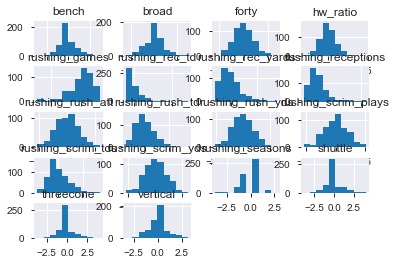

In [598]:
# histograms for some interesting measurements
value_data.hist()
pyplot.show()

In [599]:
X_train, X_validation, Y_train, Y_validation = train_test_split(value_data, label_data, test_size=0.20, random_state=1)

In [600]:
X_train.values

array([[ 0.87225803, -2.07905466, -0.50175241, ...,  1.09592041,
         1.63381068, -0.4637075 ],
       [-1.26437955,  0.40999991, -0.31793364, ..., -0.74685035,
        -0.6160069 ,  0.62724719],
       [-0.76845834,  0.2256255 ,  1.15261656, ..., -1.57896073,
        -1.26803644, -0.4637075 ],
       ...,
       [-0.16322905, -1.43374422, -0.50175241, ...,  1.21514904,
         1.92521263, -1.55466218],
       [-1.08080374, -0.14312333, -0.13411486, ...,  1.44324408,
         1.49379629,  0.62724719],
       [-0.83011963, -0.97280818,  0.41734146, ..., -0.3648642 ,
        -0.13634748, -0.4637075 ]])

In [601]:
#Logistic Regression:
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
madden_predict = clf.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))

Accuracy:  0.6037735849056604
R2 : -0.34923988662715777


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [602]:
# Plot feature importance
def plot_feat_import(coef, model_title):
    feature_coef = pd.Series(index=X_train.columns, data=coef)
    print('{} model picked {} out of {} features'.format(model_title, str(sum(feature_coef != 0)), str(X_train.shape[1])))
    top_bottom_10 = pd.concat([feature_coef.sort_values().head(10), feature_coef.sort_values().tail(10)])
    top_bottom_10.plot(kind='barh', title='Feature importance (Top and bottom 10) - {} model'.format(model_title))
    #from W207 project (Fleishman, Hilton, Niu)
    
# Plot predictions
def plot_it(y_train, y_valid, model_title):
    plt.scatter(y_train, train_labels, c = "blue", alpha=0.6, marker = "o", label = "Training data")
    plt.scatter(y_valid, dev_labels, c = "green", alpha=0.6, marker = "o", label = "Validation data")
    plt.title(model_title)
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc = "upper left")
    plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
    plt.show()

Lasso Model
Accuracy:  0.02830188679245283
R2 : 0.08584900798763229
MSE : 157.87735849056602
Lasso model picked 14 out of 18 features
----------


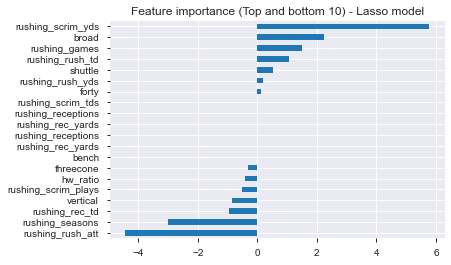

In [603]:
#Lasso:
alpha = 0.1
lasso_model = Lasso(alpha=alpha).fit(X_train, Y_train)
madden_predict = lasso_model.predict(X_validation)

madden_predict = np.around(madden_predict, decimals = 0)

print('Lasso Model')
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(lasso_model.coef_, 'Lasso')  
#plot_it()
print('----------')



Accuracy:  0.018867924528301886
R2 : 0.08726926049987138
MSE : 157.6320754716981
LassoCV Model
Lassocv model picked 15 out of 18 features
----------


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.353650164295686, tolerance: 6.671876484560571
  positive)


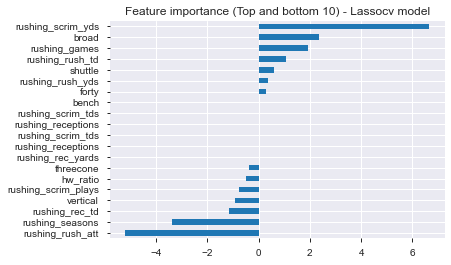

In [604]:
#Lassocv:

lasso_modelcv = LassoCV(cv=5, random_state=0).fit(X_train, Y_train)
madden_predict = lasso_modelcv.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
print('LassoCV Model')
plot_feat_import(lasso_modelcv.coef_, 'Lassocv') 
print('----------')


RidgeCV Model
Accuracy:  0.02830188679245283
R2 : 0.08956351455810374
MSE : 157.23584905660377
RidgeCV model picked 18 out of 18 features
----------
Index(['hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'rushing_games', 'rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons'],
      dtype='object')
[-0.44803943  0.31481135 -0.95186865  0.08369368  2.40353366 -0.49652317
  0.66056947  1.89265008 -1.31174629  1.25871411 -0.00949636 -2.93201286
  0.77910918  3.05785202 -2.76778482  0.46755215  3.09278079 -3.3356845 ]


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


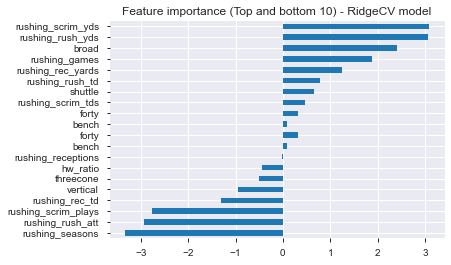

In [605]:
#RidgeCV:

ridge_model = RidgeCV(cv=5).fit(X_train, Y_train)
madden_predict = ridge_model.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)

print('RidgeCV Model')
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))

plot_feat_import(ridge_model.coef_, 'RidgeCV')
print('----------')
print(X_train.columns)
print(ridge_model.coef_)

In [606]:
['rushing_rush_yds_zscore', 'rushing_scrim_yds_zscore', 'broad_zscore', 'rushing_receptions_zscore', 
'rushing_rush_att_zscore', 'rushing_scrim_plays_zscore', 'rushing_seasons_zscore', 'vertical_zscore']


['rushing_rush_yds_zscore',
 'rushing_scrim_yds_zscore',
 'broad_zscore',
 'rushing_receptions_zscore',
 'rushing_rush_att_zscore',
 'rushing_scrim_plays_zscore',
 'rushing_seasons_zscore',
 'vertical_zscore']

ElasticNetCV Model
Accuracy:  0.02830188679245283
R2 : 0.08765163617624339
MSE : 157.56603773584905
ElasticNetCV model picked 17 out of 18 features


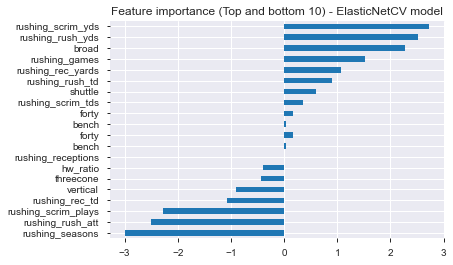

In [607]:
#ElasticNetCV:

elasticnetcv_model = ElasticNetCV(cv=5, random_state=0).fit(X_train, Y_train)
madden_predict = elasticnetcv_model.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)
print('ElasticNetCV Model')
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(elasticnetcv_model.coef_, 'ElasticNetCV')


Accuracy:  0.5
R2 : -0.6059778407626897
MSE : 277.35849056603774
Decision Tree Regressor model picked 18 out of 18 features


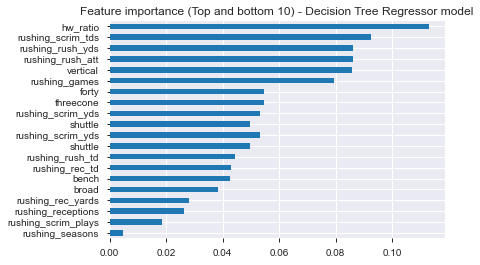

In [608]:
#Decision Tree Regressor
from sklearn import tree
decisiontreeregrssor = DecisionTreeRegressor()
decisiontreeregrssor.fit(X_train, Y_train)
madden_predict = decisiontreeregrssor.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(decisiontreeregrssor.feature_importances_, 'Decision Tree Regressor')

Accuracy:  0.5471698113207547
R2 : 0.1423859829940739
MSE : 148.11320754716982
AdaBoostRegressor model picked 18 out of 18 features


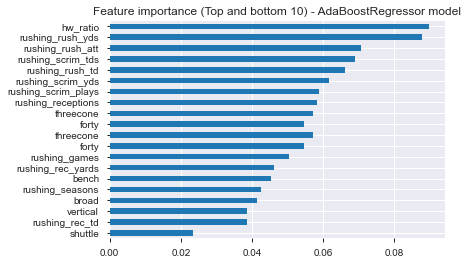

In [609]:
#Adaboost
adaboostregressor = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=300)
adaboostregressor.fit(X_train, Y_train)
madden_predict = adaboostregressor.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(adaboostregressor.feature_importances_, 'AdaBoostRegressor')



Accuracy:  0.4339622641509434
R2 : -0.8354032465859311
MSE : 316.9811320754717
Decision Tree Classifier model picked 18 out of 18 features


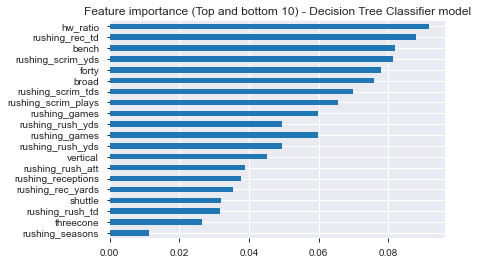

In [610]:
#Decision Tree
from sklearn import tree
decisiontree = DecisionTreeClassifier(max_depth = 100)
decisiontree.fit(X_train, Y_train)
madden_predict = decisiontree.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(decisiontree.feature_importances_, 'Decision Tree Classifier')

Accuracy:  0.5754716981132075
R2 : -0.22360216439062075
MSE : 211.32075471698113
Extra Tree Classifier model picked 18 out of 18 features


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


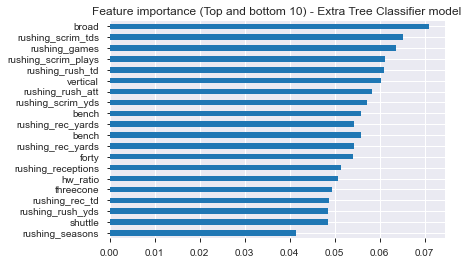

In [611]:
#Extra Tree
from sklearn import tree
extradecisiontree = ExtraTreesClassifier(max_depth = 100)
extradecisiontree.fit(X_train, Y_train)
madden_predict = extradecisiontree.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(extradecisiontree.feature_importances_, 'Extra Tree Classifier')

Accuracy:  0.42452830188679247
R2 : -0.38747745426436464
MSE : 239.62264150943398
AdaBoostRegressor model picked 18 out of 18 features


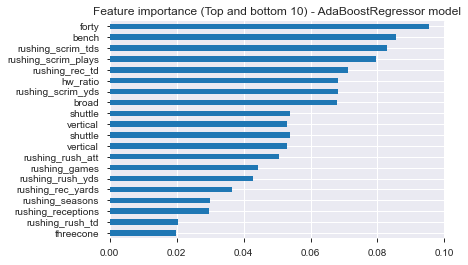

In [612]:
#Adaboost
adaboostclassifier = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=500)
adaboostclassifier.fit(X_train, Y_train)
madden_predict = adaboostclassifier.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(adaboostclassifier.feature_importances_, 'AdaBoostRegressor')

In [613]:
#SVM
svmclassifier = SVC(gamma='auto')
svmclassifier.fit(X_train, Y_train)
madden_predict = svmclassifier.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(svmclassifier.feature_importances_, 'SVC')

Accuracy:  0.6509433962264151
R2 : -0.2618397320278276
MSE : 217.9245283018868


AttributeError: 'SVC' object has no attribute 'feature_importances_'

Accuracy:  0.5566037735849056
R2 : -0.5677402731254828
MSE : 270.75471698113205
AdaBoostRegressor model picked 18 out of 18 features


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


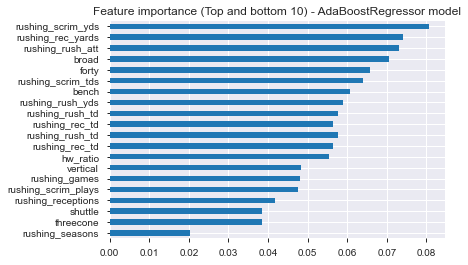

In [614]:
#RandomForest
rfclassifier = RandomForestClassifier()
rfclassifier.fit(X_train, Y_train)
madden_predict = rfclassifier.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(rfclassifier.feature_importances_, 'AdaBoostRegressor')

In [615]:
#PCA with Linear Regression
pca = PCA(n_components=5)
pca_x = pca.fit_transform(X_train)
pca_validation = pca.transform(X_validation)

log_pca = LogisticRegression(random_state=0).fit(pca_x, Y_train)
madden_predict = log_pca.predict(pca_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
#print(log_pca.coef_.shape)
#plot_feat_import(log_pca.coef_, 'PCA with Log Regression')

Accuracy:  0.6415094339622641
R2 : -0.3110023189899507
MSE : 226.41509433962264


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [616]:
eclf = VotingClassifier(estimators=[('svc', svmclassifier), ('extratrees', extradecisiontree), ('rf', rfclassifier), ('logpca', log_pca)],voting='hard')


for clf, label in zip([svmclassifier, extradecisiontree, rfclassifier, log_pca, eclf], ['SVC', 'Extra Trees', 'Random Forest', 'Log_pca', 'Ensemble']): 
    scores = cross_val_score(clf, value_data, label_data, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
#



Accuracy: 0.60 (+/- 0.02) [SVC]
Accuracy: 0.56 (+/- 0.02) [Extra Trees]
Accuracy: 0.57 (+/- 0.01) [Random Forest]
Accuracy: 0.60 (+/- 0.01) [Log_pca]


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\si

Accuracy: 0.60 (+/- 0.01) [Ensemble]


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy:  0.018867924528301886
R2 : 0.1149095593919095
R2 : 152.85849056603774
Gradient Booster Regressor model picked 18 out of 18 features


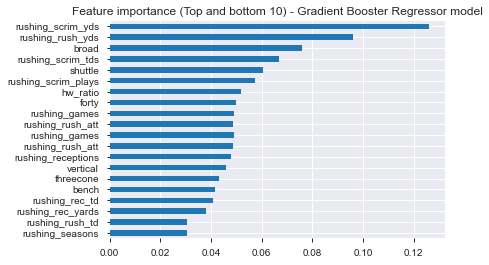

In [617]:
#Gradient Booster Regressor
import numpy as np
gradientboostingregressor = GradientBoostingRegressor(random_state=0)
gradientboostingregressor.fit(X_train, Y_train)
madden_predict = gradientboostingregressor.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('R2 : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(gradientboostingregressor.feature_importances_, 'Gradient Booster Regressor')

In [618]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LASSO', Lasso(alpha=0.1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier(n_estimators=200)))
models.append(('RFC', RandomForestClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('ETC', ExtraTreesClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, value_data, label_data, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-package

LR: 0.607862 (0.036139)
LDA: 0.602230 (0.048056)
KNN: 0.571642 (0.039633)
CART: 0.474763 (0.040473)


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


ABC: 0.380976 (0.098785)


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GBC: 0.569089 (0.043485)
RFC: 0.558285 (0.055232)
GNB: 0.424857 (0.028796)


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

SVM: 0.603827 (0.013537)
ETC: 0.584713 (0.031729)


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

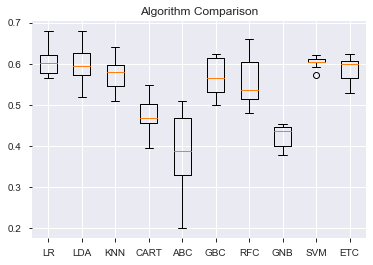

In [619]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()